In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/speaker_privacy_with_human_feedback_858.csv")
print(len(df))
df.head()

858


,date,audio_id,audio_path,audio_duration,sentence_id,source,doc_id,seq_id,text,prediction,...,audio_accent,audio_gender,How human or natural does the clip sound?,How noisy is the clip?,How robotic or synthetic does the clip sound?,How good is the overall quality of the clip?,How African does the speaker sound?,Check the Audio Transcript. How closely does the speaker accent match the country displayed?,How closely does the speaker voice match the accent displayed?,How closely does the speaker voice match the gender displayed?
0,2024-03-09 09:48:35.671518,a3e8185e-c480-4a65-bf52-d37db9690beb,https://speech-app.s3.eu-west-2.amazonaws.com/...,12.576,1920b7fa-8e45-40ad-b80a-50c5c718d00d,afrotts--speaker_privacy/vits_afrotts_ft_ext_spk,20,20,Zimbabwe__Shona__Female---------the consultant...,Zimbabwe__Shona__Female,...,Shona,Female,5.0,1.0,1.0,4.0,4.0,4.0,4.0,5.0
1,2024-03-09 09:48:35.658493,d6e51be4-cf66-4504-b4e3-31dc23bdd5ac,https://speech-app.s3.eu-west-2.amazonaws.com/...,2.240,37a0eb90-faeb-4570-befd-5f7ceca8c2e1,afrotts--speaker_privacy/vits_afrotts_ft_ext_spk,19,19,"Kenya__Swahili, Kamba__Male---------what are t...","Kenya__Swahili, Kamba__Male",...,"Swahili, Kamba",Male,4.0,1.0,1.0,4.0,5.0,4.0,3.0,5.0
2,2024-03-09 09:48:35.647247,9c5a4bd5-66b4-4345-85da-bf902d8f174f,https://speech-app.s3.eu-west-2.amazonaws.com/...,8.000,7638f6ac-2c84-44f1-8652-b419ce8186e5,afrotts--speaker_privacy/vits_afrotts_ft_ext_spk,18,18,Kenya__Swahili__Female---------by the time the...,Kenya__Swahili__Female,...,Swahili,Female,5.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0
3,2024-03-09 09:48:35.635285,559267be-3b6e-496b-aee4-3e069782455d,https://speech-app.s3.eu-west-2.amazonaws.com/...,8.656,bcf475e5-5fe3-42a9-b1af-11bd7c7db993,afrotts--speaker_privacy/vits_afrotts_ft_ext_spk,17,17,Kenya__Swahili__Male---------by the time they ...,Kenya__Swahili__Male,...,Swahili,Male,1.0,1.0,4.0,1.0,5.0,5.0,5.0,5.0
4,2024-03-09 09:48:35.628881,4b58a7be-a6b2-468e-9240-6f9ae263ca5b,https://speech-app.s3.eu-west-2.amazonaws.com/...,6.256,ff44ecae-643c-45e0-ac53-71dea1af9946,afrotts--speaker_privacy/vits_afrotts_ft_ext_spk,16,16,Kenya__Unknown__Female---------i am about to b...,Kenya__Unknown__Female,...,Unknown,Female,5.0,NaN,0.0,5.0,5.0,5.0,5.0,5.0


In [3]:
questions = {
    "How human or natural does the clip sound?": "Nat-MOS",
    "How robotic or synthetic does the clip sound?": "syntheticness",
    "How good is the overall quality of the clip?": "MOS",
    "How African does the speaker sound?": "Accent-MOS",
    "How closely does the speaker voice match the accent displayed?": "Accent-Match-MOS",
    "How closely does the speaker voice match the gender displayed?": "gender_match",
    "Check the Audio Transcript. How closely does the speaker accent match the country displayed?": "Country-Match-MOS",
    "How noisy is the clip?": "noisyness"
}
df = df.rename( columns=questions)

In [4]:
models={
    'afrotts--speaker_privacy/denoised_samples': 'GT denoised',
    'afrotts--speaker_privacy/vits_afrotts': 'VITS-O',
    'afrotts--speaker_privacy/vits_afrotts_ft': 'VITS-FT',
    'afrotts--speaker_privacy/vits_afrotts_ft_ext_spk': 'VITS-EXT',
    'afrotts--speaker_privacy/vits_vctk': 'VITS',
    'afrotts--speaker_privacyn/xtts': 'XTTS',
    'afrotts--speaker_privacy/xtts_ft': 'XTTS-FT'
}

In [5]:
df['source'] = df['source'].map(models)

In [6]:
# df['source']

In [7]:
def print_na_columns(df):
    for c in df:
        if df[c].hasnans:
            print(f"Total nan values in `{c}`: {df[c].isna().sum()}")
print_na_columns(df)

Total nan values in `age_group`: 4
Total nan values in `discipline`: 7
Total nan values in `Nat-MOS`: 3
Total nan values in `noisyness`: 113
Total nan values in `syntheticness`: 45
Total nan values in `MOS`: 9
Total nan values in `Accent-MOS`: 8
Total nan values in `Country-Match-MOS`: 12
Total nan values in `Accent-Match-MOS`: 8
Total nan values in `gender_match`: 1


In [8]:
# df = df[~df["audio_duration"].isna()]
# df = df[~df["age_group"].isna()]
# print(len(df))

In [9]:
columns=list(questions.values())

In [10]:
df[columns] = df[columns].replace(0, np.nan)

In [11]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    data = data[~np.isnan(data)]
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return f'{round(m, 2)}$\pm${round(h, 2)}'

### Table 1 -- model average

In [12]:
groupby=['source']
results = []

for m in columns:
    df_tmp = df.groupby(groupby)[m].apply(lambda d: mean_confidence_interval(d)).reset_index()
    df_tmp = df_tmp.set_index(groupby)
#     df_tmp = df_tmp.pivot(groupby, "level_1", m).rename(columns={0:'mean', 1:'CI'})
#     df_tmp = pd.concat([df_tmp], axis=1, levels=[[m]], keys=[m])
#     print(df_tmp.columns)
#     display(df_tmp)
    results.append(df_tmp)

columns_to_print=["MOS", "Nat-MOS", "Accent-MOS"]
df_tmp = pd.concat(results, axis=1)[columns_to_print]
display(df_tmp)
print(df_tmp.to_latex())

,MOS,Nat-MOS,Accent-MOS
source,,,
VITS-EXT,3.17$\pm$0.16,4.05$\pm$0.15,4.1$\pm$0.14
VITS-FT,3.47$\pm$0.15,4.22$\pm$0.14,4.37$\pm$0.11
VITS-O,3.18$\pm$0.17,4.08$\pm$0.16,4.2$\pm$0.13


\begin{tabular}{llll}
\toprule
{} &            MOS &        Nat-MOS &     Accent-MOS \\
source   &                &                &                \\
\midrule
VITS-EXT &  3.17\$\textbackslash pm\$0.16 &  4.05\$\textbackslash pm\$0.15 &   4.1\$\textbackslash pm\$0.14 \\
VITS-FT  &  3.47\$\textbackslash pm\$0.15 &  4.22\$\textbackslash pm\$0.14 &  4.37\$\textbackslash pm\$0.11 \\
VITS-O   &  3.18\$\textbackslash pm\$0.17 &  4.08\$\textbackslash pm\$0.16 &   4.2\$\textbackslash pm\$0.13 \\
\bottomrule
\end{tabular}



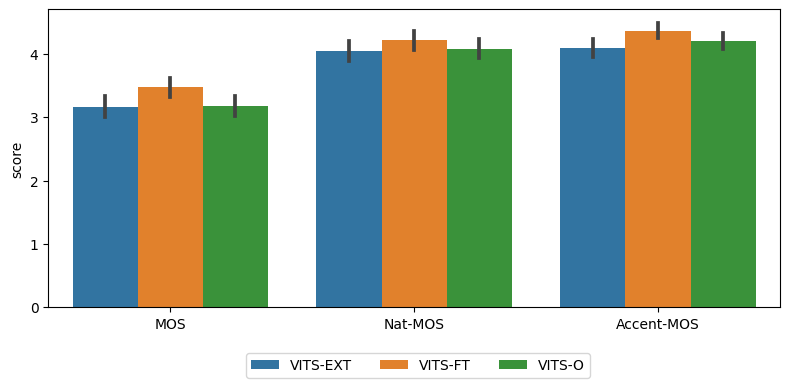

In [13]:
# Table 1: avg quality, naturalness, accentedness at the dataset level. Each row is one model. 7 rows



df_ = df.rename(columns={'overall_quality': 'MOS',
                         'naturalness': 'Nat-MOS',
                         'african_accentedness': 'Accent-MOS'})


plot_df = df_.set_index('source')[columns_to_print].stack().reset_index().rename(columns={0:'score', 'level_1': 'metric'})
plt.figure(figsize=(8,4))
sns.barplot(plot_df, y='score', x='metric', hue='source')
plt.xlabel("")
plt.legend(bbox_to_anchor=(0.75, -0.13), ncols=4)
plt.tight_layout()

plt.savefig('afrotts-speaker-privacy-mos-models.pdf', format='pdf', dpi='figure')


## Table 2 - accent-level filter average

In [14]:
# Table 2/3
def f(row):
    split1 = row["audio_accent"].split(", ")
    split2 = row["accent"].split(", ")
    split2 = [i.lower() for i in split2]
    
    for i in split1:
        if i.lower() in split2:
            return True
    else:
        return False
df_filter = df[df.apply(lambda x: f(x), axis=1)]
df_filter[["accent", "audio_accent"]]

,accent,audio_accent
19,Zulu,Zulu
20,Zulu,Zulu
21,Shona,Shona
40,Zulu,Zulu
41,Zulu,Zulu
61,Zulu,Zulu
62,Zulu,Zulu
63,Shona,Shona
83,Zulu,Zulu
104,Zulu,Zulu


In [15]:
for s in df_filter['source'].unique():
    print(s)
    df_ = df_filter.query(f"source == '{s}'")
    groupby=['audio_country']
    results = []

    for m in columns:
        df_tmp = df_.groupby(groupby)[m].apply(lambda d: mean_confidence_interval(d)).reset_index()
        df_tmp = df_tmp.set_index(groupby)
    #     df_tmp = df_tmp.pivot(groupby, "level_1", m).rename(columns={0:'mean', 1:'CI'})
    #     df_tmp = pd.concat([df_tmp], axis=1, levels=[[m]], keys=[m])
    #     print(df_tmp.columns)
    #     display(df_tmp)
        results.append(df_tmp)

    columns_to_print=["Country-Match-MOS", "Accent-Match-MOS"]
    df_tmp = pd.concat(results, axis=1)[columns_to_print]
    display(df_tmp)
    print(df_tmp.to_latex())

VITS-EXT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,4.0$\pm$4.3,4.0$\pm$4.3
Nigeria,2.0$\pm$1.63,1.83$\pm$1.03
South Africa,2.25$\pm$2.39,2.0$\pm$2.25
Zimbabwe,4.0$\pm$nan,4.0$\pm$nan


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &       4.0\$\textbackslash pm\$4.3 &      4.0\$\textbackslash pm\$4.3 \\
Nigeria       &      2.0\$\textbackslash pm\$1.63 &    1.83\$\textbackslash pm\$1.03 \\
South Africa  &     2.25\$\textbackslash pm\$2.39 &     2.0\$\textbackslash pm\$2.25 \\
Zimbabwe      &       4.0\$\textbackslash pm\$nan &      4.0\$\textbackslash pm\$nan \\
\bottomrule
\end{tabular}

VITS-FT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,4.5$\pm$6.35,4.5$\pm$6.35
Nigeria,3.8$\pm$2.04,4.6$\pm$0.68
South Africa,4.33$\pm$1.43,4.33$\pm$1.43
Zimbabwe,nan$\pm$nan,nan$\pm$nan


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &      4.5\$\textbackslash pm\$6.35 &     4.5\$\textbackslash pm\$6.35 \\
Nigeria       &      3.8\$\textbackslash pm\$2.04 &     4.6\$\textbackslash pm\$0.68 \\
South Africa  &     4.33\$\textbackslash pm\$1.43 &    4.33\$\textbackslash pm\$1.43 \\
Zimbabwe      &       nan\$\textbackslash pm\$nan &      nan\$\textbackslash pm\$nan \\
\bottomrule
\end{tabular}

VITS-O


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Nigeria,1.33$\pm$1.43,1.33$\pm$1.43
South Africa,3.75$\pm$1.07,3.5$\pm$1.34


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Nigeria       &     1.33\$\textbackslash pm\$1.43 &    1.33\$\textbackslash pm\$1.43 \\
South Africa  &     3.75\$\textbackslash pm\$1.07 &     3.5\$\textbackslash pm\$1.34 \\
\bottomrule
\end{tabular}



In [16]:
for s in df_filter['source'].unique():
    print(s)
    df_ = df_filter.query(f"source == '{s}'")
    groupby=['audio_accent']
    results = []

    for m in columns:
        df_tmp = df_.groupby(groupby)[m].apply(lambda d: mean_confidence_interval(d)).reset_index()
        df_tmp = df_tmp.set_index(groupby)
        results.append(df_tmp)

    df_tmp = pd.concat(results, axis=1)[columns_to_print]
    display(df_tmp)
    print(df_tmp.to_latex())

VITS-EXT


,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Hausa,1.0$\pm$nan,1.0$\pm$nan
Ijaw,1.33$\pm$1.43,1.33$\pm$1.43
Shona,4.0$\pm$nan,4.0$\pm$nan
Swahili,5.0$\pm$nan,5.0$\pm$nan
"Swahili, Kamba",2.0$\pm$nan,2.0$\pm$nan
Tswana,3.0$\pm$nan,2.0$\pm$nan
Unknown,5.0$\pm$nan,5.0$\pm$nan
Yoruba,3.5$\pm$19.06,3.0$\pm$0.0
Zulu,2.0$\pm$4.3,2.0$\pm$4.3


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent   &                   &                  \\
\midrule
Hausa          &       1.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Ijaw           &     1.33\$\textbackslash pm\$1.43 &    1.33\$\textbackslash pm\$1.43 \\
Shona          &       4.0\$\textbackslash pm\$nan &      4.0\$\textbackslash pm\$nan \\
Swahili        &       5.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Swahili, Kamba &       2.0\$\textbackslash pm\$nan &      2.0\$\textbackslash pm\$nan \\
Tswana         &       3.0\$\textbackslash pm\$nan &      2.0\$\textbackslash pm\$nan \\
Unknown        &       5.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Yoruba         &     3.5\$\textbackslash pm\$19.06 &      3.0\$\textbackslash pm\$0.0 \\
Zulu           &       2.0\$\textbackslash pm\$4.3 &      2.0\$\textbackslash pm\$4.3 \\
\bottomrule
\end{tabular}

VITS-FT


,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Afrikaans,4.0$\pm$nan,5.0$\pm$nan
Hausa,4.0$\pm$nan,4.5$\pm$6.35
Igbo,4.0$\pm$nan,4.0$\pm$nan
Shona,nan$\pm$nan,nan$\pm$nan
Swahili,5.0$\pm$nan,5.0$\pm$nan
Unknown,4.5$\pm$6.35,4.5$\pm$6.35
Yoruba,3.0$\pm$25.41,5.0$\pm$nan
Zulu,4.5$\pm$6.35,4.0$\pm$0.0


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent &                   &                  \\
\midrule
Afrikaans    &       4.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Hausa        &       4.0\$\textbackslash pm\$nan &     4.5\$\textbackslash pm\$6.35 \\
Igbo         &       4.0\$\textbackslash pm\$nan &      4.0\$\textbackslash pm\$nan \\
Shona        &       nan\$\textbackslash pm\$nan &      nan\$\textbackslash pm\$nan \\
Swahili      &       5.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Unknown      &      4.5\$\textbackslash pm\$6.35 &     4.5\$\textbackslash pm\$6.35 \\
Yoruba       &     3.0\$\textbackslash pm\$25.41 &      5.0\$\textbackslash pm\$nan \\
Zulu         &      4.5\$\textbackslash pm\$6.35 &      4.0\$\textbackslash pm\$0.0 \\
\bottomrule
\end{tabular}

VITS-O


,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Hausa,2.0$\pm$nan,2.0$\pm$nan
Ibibio,nan$\pm$nan,nan$\pm$nan
Igbo,1.0$\pm$nan,1.0$\pm$nan
Pidgin,nan$\pm$nan,nan$\pm$nan
Siswati,4.0$\pm$nan,5.0$\pm$nan
Tswana,3.0$\pm$nan,2.0$\pm$nan
Xhosa,1.0$\pm$nan,1.0$\pm$nan
Yoruba,1.0$\pm$nan,1.0$\pm$nan
Zulu,4.4$\pm$0.68,4.0$\pm$1.52


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent &                   &                  \\
\midrule
Hausa        &       2.0\$\textbackslash pm\$nan &      2.0\$\textbackslash pm\$nan \\
Ibibio       &       nan\$\textbackslash pm\$nan &      nan\$\textbackslash pm\$nan \\
Igbo         &       1.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Pidgin       &       nan\$\textbackslash pm\$nan &      nan\$\textbackslash pm\$nan \\
Siswati      &       4.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Tswana       &       3.0\$\textbackslash pm\$nan &      2.0\$\textbackslash pm\$nan \\
Xhosa        &       1.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Yoruba       &       1.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Zulu         &      4.4\$\textbackslash pm\$0.68 &     4.0\$\textbackslash pm\$1.52 \\
\bottomrule
\end{tabular}



In [17]:
for s in df_filter['source'].unique():
    print(s)
    df_ = df_filter.query(f"source == '{s}'")
    groupby=['audio_accent']
    results = []

    for m in columns:
        df_tmp = df_.groupby(groupby)[m].apply(lambda d: len(d)).reset_index()
        df_tmp = df_tmp.set_index(groupby)
        display(df_tmp)

VITS-EXT


,Nat-MOS
audio_accent,
Hausa,1
Ijaw,3
Shona,1
Swahili,1
"Swahili, Kamba",1
Tswana,1
Unknown,1
Yoruba,3
Zulu,4


,syntheticness
audio_accent,
Hausa,1
Ijaw,3
Shona,1
Swahili,1
"Swahili, Kamba",1
Tswana,1
Unknown,1
Yoruba,3
Zulu,4


,MOS
audio_accent,
Hausa,1
Ijaw,3
Shona,1
Swahili,1
"Swahili, Kamba",1
Tswana,1
Unknown,1
Yoruba,3
Zulu,4


,Accent-MOS
audio_accent,
Hausa,1
Ijaw,3
Shona,1
Swahili,1
"Swahili, Kamba",1
Tswana,1
Unknown,1
Yoruba,3
Zulu,4


,Accent-Match-MOS
audio_accent,
Hausa,1
Ijaw,3
Shona,1
Swahili,1
"Swahili, Kamba",1
Tswana,1
Unknown,1
Yoruba,3
Zulu,4


,gender_match
audio_accent,
Hausa,1
Ijaw,3
Shona,1
Swahili,1
"Swahili, Kamba",1
Tswana,1
Unknown,1
Yoruba,3
Zulu,4


,Country-Match-MOS
audio_accent,
Hausa,1
Ijaw,3
Shona,1
Swahili,1
"Swahili, Kamba",1
Tswana,1
Unknown,1
Yoruba,3
Zulu,4


,noisyness
audio_accent,
Hausa,1
Ijaw,3
Shona,1
Swahili,1
"Swahili, Kamba",1
Tswana,1
Unknown,1
Yoruba,3
Zulu,4


VITS-FT


,Nat-MOS
audio_accent,
Afrikaans,1
Hausa,3
Igbo,1
Shona,1
Swahili,1
Unknown,2
Yoruba,2
Zulu,4


,syntheticness
audio_accent,
Afrikaans,1
Hausa,3
Igbo,1
Shona,1
Swahili,1
Unknown,2
Yoruba,2
Zulu,4


,MOS
audio_accent,
Afrikaans,1
Hausa,3
Igbo,1
Shona,1
Swahili,1
Unknown,2
Yoruba,2
Zulu,4


,Accent-MOS
audio_accent,
Afrikaans,1
Hausa,3
Igbo,1
Shona,1
Swahili,1
Unknown,2
Yoruba,2
Zulu,4


,Accent-Match-MOS
audio_accent,
Afrikaans,1
Hausa,3
Igbo,1
Shona,1
Swahili,1
Unknown,2
Yoruba,2
Zulu,4


,gender_match
audio_accent,
Afrikaans,1
Hausa,3
Igbo,1
Shona,1
Swahili,1
Unknown,2
Yoruba,2
Zulu,4


,Country-Match-MOS
audio_accent,
Afrikaans,1
Hausa,3
Igbo,1
Shona,1
Swahili,1
Unknown,2
Yoruba,2
Zulu,4


,noisyness
audio_accent,
Afrikaans,1
Hausa,3
Igbo,1
Shona,1
Swahili,1
Unknown,2
Yoruba,2
Zulu,4


VITS-O


,Nat-MOS
audio_accent,
Hausa,1
Ibibio,1
Igbo,1
Pidgin,1
Siswati,1
Tswana,1
Xhosa,1
Yoruba,2
Zulu,5


,syntheticness
audio_accent,
Hausa,1
Ibibio,1
Igbo,1
Pidgin,1
Siswati,1
Tswana,1
Xhosa,1
Yoruba,2
Zulu,5


,MOS
audio_accent,
Hausa,1
Ibibio,1
Igbo,1
Pidgin,1
Siswati,1
Tswana,1
Xhosa,1
Yoruba,2
Zulu,5


,Accent-MOS
audio_accent,
Hausa,1
Ibibio,1
Igbo,1
Pidgin,1
Siswati,1
Tswana,1
Xhosa,1
Yoruba,2
Zulu,5


,Accent-Match-MOS
audio_accent,
Hausa,1
Ibibio,1
Igbo,1
Pidgin,1
Siswati,1
Tswana,1
Xhosa,1
Yoruba,2
Zulu,5


,gender_match
audio_accent,
Hausa,1
Ibibio,1
Igbo,1
Pidgin,1
Siswati,1
Tswana,1
Xhosa,1
Yoruba,2
Zulu,5


,Country-Match-MOS
audio_accent,
Hausa,1
Ibibio,1
Igbo,1
Pidgin,1
Siswati,1
Tswana,1
Xhosa,1
Yoruba,2
Zulu,5


,noisyness
audio_accent,
Hausa,1
Ibibio,1
Igbo,1
Pidgin,1
Siswati,1
Tswana,1
Xhosa,1
Yoruba,2
Zulu,5


### Table 3 -- apply country-level filter

In [18]:
!pip install pycountry


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [19]:
import pycountry
pycountry.countries.get(alpha_2='ZW').name

'Zimbabwe'

In [20]:
df['country_'] =  df['country'].apply(lambda x: pycountry.countries.get(alpha_2=x).name)

In [21]:
# Table 2/3
def f2(row):
    split1 = row["audio_country"].split(", ")
    split2 = row["country_"].split(", ")
    split2 = [i.lower() for i in split2]
    
    for i in split1:
        if i.lower() in split2:
            return True
    else:
        return False
df_filter_country= df[df.apply(lambda x: f2(x), axis=1)]
df_filter_country[["country_", "audio_country"]]

,country_,audio_country
6,South Africa,South Africa
7,South Africa,South Africa
8,South Africa,South Africa
9,South Africa,South Africa
10,South Africa,South Africa
...,...,...
849,Nigeria,Nigeria
851,Nigeria,Nigeria
852,Nigeria,Nigeria
854,Nigeria,Nigeria


In [22]:
len(df)

858

In [23]:
for s in df_filter_country['source'].unique():
    print(s)
    df_ = df_filter_country.query(f"source == '{s}'")
    groupby=['audio_country']
    results = []

    for m in columns:
        df_tmp = df_.groupby(groupby)[m].apply(lambda d: mean_confidence_interval(d)).reset_index()
        df_tmp = df_tmp.set_index(groupby)
        results.append(df_tmp)

    df_tmp = pd.concat(results, axis=1)[columns_to_print]
    display(df_tmp)
    print(df_tmp.to_latex())

VITS-EXT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,3.25$\pm$3.28,4.0$\pm$2.25
Nigeria,3.62$\pm$0.28,3.2$\pm$0.27
South Africa,2.97$\pm$0.54,2.91$\pm$0.54
Zimbabwe,4.0$\pm$nan,4.0$\pm$nan


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &     3.25\$\textbackslash pm\$3.28 &     4.0\$\textbackslash pm\$2.25 \\
Nigeria       &     3.62\$\textbackslash pm\$0.28 &     3.2\$\textbackslash pm\$0.27 \\
South Africa  &     2.97\$\textbackslash pm\$0.54 &    2.91\$\textbackslash pm\$0.54 \\
Zimbabwe      &       4.0\$\textbackslash pm\$nan &      4.0\$\textbackslash pm\$nan \\
\bottomrule
\end{tabular}

VITS-FT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,3.5$\pm$19.06,4.5$\pm$6.35
Nigeria,4.14$\pm$0.25,3.79$\pm$0.28
South Africa,3.41$\pm$0.46,3.22$\pm$0.48


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &     3.5\$\textbackslash pm\$19.06 &     4.5\$\textbackslash pm\$6.35 \\
Nigeria       &     4.14\$\textbackslash pm\$0.25 &    3.79\$\textbackslash pm\$0.28 \\
South Africa  &     3.41\$\textbackslash pm\$0.46 &    3.22\$\textbackslash pm\$0.48 \\
\bottomrule
\end{tabular}

VITS-O


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,5.0$\pm$nan,5.0$\pm$nan
Nigeria,3.54$\pm$0.31,3.37$\pm$0.31
South Africa,3.08$\pm$0.53,3.08$\pm$0.56


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &       5.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Nigeria       &     3.54\$\textbackslash pm\$0.31 &    3.37\$\textbackslash pm\$0.31 \\
South Africa  &     3.08\$\textbackslash pm\$0.53 &    3.08\$\textbackslash pm\$0.56 \\
\bottomrule
\end{tabular}



In [24]:
# df.query(f"source=='afrotts--mos_evaluation/xtts' ")["naturalness"].mean(), df.query(f"source=='afrotts--mos_evaluation/xtts' ")["naturalness"].std()